<a href="https://colab.research.google.com/github/MuhRiswan/SkripsiSentimenPemilu2024_NaiveBayes/blob/main/skripsi_analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Pemberitaan hasil Rekapitulasi Pemilu presiden 2024**



Tahapan Analisis Data Sentimen


1.   Data Selection
     * Normalisasi
     * Labeling
2.   PreProcessing

     * Cleaning
     * Stopword
     * Tokenize
     * Stemming     
3.   Visualiasi
4.   Klasifikasi Sentimen
5.   Evaluation

#Select Data

In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/dataSkripsi.csv")
df.head()

,profilePictureUrl,username,comment,commentDate,commentId
0,https://scontent.cdninstagram.com/v/t51.2885-1...,m.firzafrdnsyh,"01 & 03 ilmu token listrik , semakin sedikit s...",2024-03-20T15:03:51.000Z,17992072769384499
1,https://scontent.cdninstagram.com/v/t51.2885-1...,della.frawidana,Alhamdulillah abah terselamatkan dari amanah y...,2024-03-20T15:38:08.000Z,18012171638201082
2,https://scontent.cdninstagram.com/v/t51.2885-1...,rafa.rafiumi,Kita tinggal liat aja dengan janji2nya amanah ...,2024-03-20T15:41:52.000Z,17880168653981113
3,https://scontent.cdninstagram.com/v/t51.2885-1...,dina_hermina_zakaria,Allah tidak tidur.. kebenaran akan segera terk...,2024-03-20T15:08:12.000Z,17972898254689322
4,https://scontent.cdninstagram.com/v/t51.2885-1...,alilaeos,Angka itu sudah ga penting bagi saya pribadi.....,2024-03-20T15:27:52.000Z,18005217719381876


In [9]:
df = df[['username', 'comment', 'commentDate']]
df

,username,comment,commentDate
0,m.firzafrdnsyh,"01 & 03 ilmu token listrik , semakin sedikit s...",2024-03-20T15:03:51.000Z
1,della.frawidana,Alhamdulillah abah terselamatkan dari amanah y...,2024-03-20T15:38:08.000Z
2,rafa.rafiumi,Kita tinggal liat aja dengan janji2nya amanah ...,2024-03-20T15:41:52.000Z
3,dina_hermina_zakaria,Allah tidak tidur.. kebenaran akan segera terk...,2024-03-20T15:08:12.000Z
4,alilaeos,Angka itu sudah ga penting bagi saya pribadi.....,2024-03-20T15:27:52.000Z
...,...,...,...
2189,abdulazis89_77,"78% komentar hancur, 5% komentar ayo bersama ...",2024-03-22T04:01:54.000Z
2190,abdulazis89_77,;,2024-03-22T04:02:18.000Z
2191,yenniedewanto,Jokowi 3 periode dengan second account 😂,2024-03-22T04:10:21.000Z
2192,nanasalsa92,Gak sabar liat gibran ngomong d sidang PBB ter...,2024-03-22T04:19:06.000Z


In [10]:
#Labeling data
!pip install transformers
!pip install googletrans==3.1.0a0
from googletrans.client import Translator
translator  = Translator()

from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [11]:
df['comments'] = df['comment'].str.encode('ascii', 'ignore').apply(translator.translate, dest='en')
df['comments'] = df['comments'].apply(getattr, args=('text',))

In [12]:
df = (
    df
    .assign(
        label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label']))
    )
)
df.to_csv("/content/dataClean.csv", index=False)

In [21]:
df = pd.read_csv("/content/dataClean.csv")
df.head()

,username,comment,commentDate,comments,label
0,m.firzafrdnsyh,"01 & 03 ilmu token listrik , semakin sedikit s...",2024-03-20T15:03:51.000Z,"b'01 & 03 electric token science, the less the...",NEGATIVE
1,della.frawidana,Alhamdulillah abah terselamatkan dari amanah ...,2024-03-20T15:38:08.000Z,b'Alhamdulillah I was saved from a heavy trust',NEGATIVE
2,rafa.rafiumi,Kita tinggal liat saja dengan janji2nya aman...,2024-03-20T15:41:52.000Z,b'We'll just have to see whether the promises ...,NEGATIVE
3,dina_hermina_zakaria,Allah tidak tidur.. kebenaran akan segera terk...,2024-03-20T15:08:12.000Z,b'Allah does not sleep.. the truth will soon b...,NEGATIVE
4,alilaeos,Angka itu sudah tidak penting bagi saya prib...,2024-03-20T15:27:52.000Z,b'That figure is no longer important to me per...,NEGATIVE


#Preprocessing

In [22]:
#Cleaning
import re
import string

# Fungsi untuk membersihkan komentar Instagram
def clean_comment_instagram(data):
    if pd.isna(data): # Check if data is NaN
        return ''
    # Menghapus karakter khusus macam @mentions, #hastag, url, dan emote
    data = re.sub(r'@[A-Za-z0-9_]+', '', data)
    data = re.sub(r'#\w+', '', data)
    data = re.sub(r'RT[\s]+', '', data)
    data = re.sub(r'https?://\S+', '', data)
    data = re.sub(r'[^A-Za-z0-9]', ' ', data)

    # Menghapus tanda baca
    data = data.translate(str.maketrans('', '', string.punctuation))

    # Normalisasi teks
    # data = data.lower() # Mengubah menjadi lowercase
    data = re.sub(r'\s+', ' ', data).strip() # Menghapus spasi berlebih

    # Menghapus angka yang menempel pada kata
    data = re.sub(r'\d+', '', data)

    return data # Mengembalikan data tanpa koreksi typo

# Menambahkan kolom baru 'Cleaning' dengan data yang telah dibersihkan
df['cleaning'] = df['comment'].apply(clean_comment_instagram)

# Menghapus duplikat dan data kosong
df = df.drop_duplicates(subset=['cleaning'])
df = df.dropna()

# Memilih kolom 'comment', 'label', dan 'Cleaning'
df = df[['comment', 'label', 'cleaning']]

# Menampilkan 5 baris pertama untuk memastikan kolom baru telah ditambahkan
df.head()

,comment,label,cleaning
0,"01 & 03 ilmu token listrik , semakin sedikit s...",NEGATIVE,ilmu token listrik semakin sedikit semakin b...
1,Alhamdulillah abah terselamatkan dari amanah ...,NEGATIVE,Alhamdulillah abah terselamatkan dari amanah y...
2,Kita tinggal liat saja dengan janji2nya aman...,NEGATIVE,Kita tinggal liat saja dengan janjinya amanah ...
3,Allah tidak tidur.. kebenaran akan segera terk...,NEGATIVE,Allah tidak tidur kebenaran akan segera terkua...
4,Angka itu sudah tidak penting bagi saya prib...,NEGATIVE,Angka itu sudah tidak penting bagi saya pribad...


In [25]:
# - Case Folding

df['case_folding'] = df['cleaning'].str.lower()
df.head()

,comment,label,cleaning,case_folding
0,"01 & 03 ilmu token listrik , semakin sedikit s...",NEGATIVE,ilmu token listrik semakin sedikit semakin b...,ilmu token listrik semakin sedikit semakin b...
1,Alhamdulillah abah terselamatkan dari amanah ...,NEGATIVE,Alhamdulillah abah terselamatkan dari amanah y...,alhamdulillah abah terselamatkan dari amanah y...
2,Kita tinggal liat saja dengan janji2nya aman...,NEGATIVE,Kita tinggal liat saja dengan janjinya amanah ...,kita tinggal liat saja dengan janjinya amanah ...
3,Allah tidak tidur.. kebenaran akan segera terk...,NEGATIVE,Allah tidak tidur kebenaran akan segera terkua...,allah tidak tidur kebenaran akan segera terkua...
4,Angka itu sudah tidak penting bagi saya prib...,NEGATIVE,Angka itu sudah tidak penting bagi saya pribad...,angka itu sudah tidak penting bagi saya pribad...


In [26]:
#Stopword Removal
!pip install Sastrawi

In [27]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = ["indonesia", "indonesian"]

# Buat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()

# Ambil daftar stopwords bawaan dari Sastrawi
stop_words = factory.get_stop_words()

# Tambahkan stopwords tambahan ke daftar stopwords
stop_words.extend(more_stop_words)

# Buat array dictionary untuk stopwords
new_array = ArrayDictionary(stop_words)

# Buat instance dari StopWordRemover dengan stopwords yang telah diperbarui
stop_words_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stopwords dari teks
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# Terapkan fungsi stopword ke kolom 'comment' pada DataFrame
df['stopword_removal'] = df['case_folding'].apply(stopword)

# Lihat beberapa baris hasil untuk memastikan
df.head()

,comment,label,cleaning,case_folding,stopword_removal
0,"01 & 03 ilmu token listrik , semakin sedikit s...",NEGATIVE,ilmu token listrik semakin sedikit semakin b...,ilmu token listrik semakin sedikit semakin b...,ilmu token listrik semakin sedikit semakin b...
1,Alhamdulillah abah terselamatkan dari amanah ...,NEGATIVE,Alhamdulillah abah terselamatkan dari amanah y...,alhamdulillah abah terselamatkan dari amanah y...,alhamdulillah abah terselamatkan amanah berat
2,Kita tinggal liat saja dengan janji2nya aman...,NEGATIVE,Kita tinggal liat saja dengan janjinya amanah ...,kita tinggal liat saja dengan janjinya amanah ...,tinggal liat dengan janjinya amanah dan siap p...
3,Allah tidak tidur.. kebenaran akan segera terk...,NEGATIVE,Allah tidak tidur kebenaran akan segera terkua...,allah tidak tidur kebenaran akan segera terkua...,allah tidur kebenaran segera terkuat siap lah ...
4,Angka itu sudah tidak penting bagi saya prib...,NEGATIVE,Angka itu sudah tidak penting bagi saya pribad...,angka itu sudah tidak penting bagi saya pribad...,angka penting saya pribadi awal sudah tidak be...


In [28]:
# Tokenizing
df['tokenized'] = df['stopword_removal'].apply(lambda x:x.split())
df.head()

,comment,label,cleaning,case_folding,stopword_removal,tokenized
0,"01 & 03 ilmu token listrik , semakin sedikit s...",NEGATIVE,ilmu token listrik semakin sedikit semakin b...,ilmu token listrik semakin sedikit semakin b...,ilmu token listrik semakin sedikit semakin b...,"[ilmu, token, listrik, semakin, sedikit, semak..."
1,Alhamdulillah abah terselamatkan dari amanah ...,NEGATIVE,Alhamdulillah abah terselamatkan dari amanah y...,alhamdulillah abah terselamatkan dari amanah y...,alhamdulillah abah terselamatkan amanah berat,"[alhamdulillah, abah, terselamatkan, amanah, b..."
2,Kita tinggal liat saja dengan janji2nya aman...,NEGATIVE,Kita tinggal liat saja dengan janjinya amanah ...,kita tinggal liat saja dengan janjinya amanah ...,tinggal liat dengan janjinya amanah dan siap p...,"[tinggal, liat, dengan, janjinya, amanah, dan,..."
3,Allah tidak tidur.. kebenaran akan segera terk...,NEGATIVE,Allah tidak tidur kebenaran akan segera terkua...,allah tidak tidur kebenaran akan segera terkua...,allah tidur kebenaran segera terkuat siap lah ...,"[allah, tidur, kebenaran, segera, terkuat, sia..."
4,Angka itu sudah tidak penting bagi saya prib...,NEGATIVE,Angka itu sudah tidak penting bagi saya pribad...,angka itu sudah tidak penting bagi saya pribad...,angka penting saya pribadi awal sudah tidak be...,"[angka, penting, saya, pribadi, awal, sudah, t..."


In [29]:
# - Stemming

# Mengimpor pustaka yang diperlukan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat instance dari StemmerFactory dan Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stemming(text_cleaning):
    # Menstem setiap kata dalam teks yang sudah dibersihkan
    stemmed_words = [stemmer.stem(word) for word in text_cleaning]
    # Menggabungkan kembali kata-kata yang sudah di-stem menjadi satu string
    return " ".join(stemmed_words)

# Asumsikan 'tokenized' adalah DataFrame yang sudah berisi tokenisasi komentar
df['comment'] = df['tokenized'].apply(stemming)
# Menerapkan stemming pada setiap tokenized comment
tokenized = df['comment']

# Menyimpan hasil preprocessing ke file CSV
tokenized.to_csv("/content/hasilPreProcessingData.csv", index=False)

# Membaca kembali hasil preprocessing dari file CSV
data = pd.read_csv("/content/hasilPreProcessingData.csv", encoding='latin1')


#TF-IDF

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Sesuaikan dengan data 'comment' yang telah di-preprocessing dan transformasikan
tfidf = tfidf_vectorizer.fit_transform(df['comment'])  # Ganti 'df' dengan nama DataFrame Anda yang berisi data yang telah di-preprocessing

# Dapatkan daftar fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Buat DataFrame untuk menampilkan kata dan bobotnya
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=feature_names)

# Tampilkan DataFrame
print(df_tfidf)

      aaaa  aaah  aall  aamiin  aaowkwowk  abaaah  abad  abadiii      abah  \
0      0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
1      0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.412818   
2      0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
3      0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
4      0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
...    ...   ...   ...     ...        ...     ...   ...      ...       ...   
1952   0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
1953   0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
1954   0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
1955   0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   
1956   0.0   0.0   0.0     0.0        0.0     0.0   0.0      0.0  0.000000   

      abahanya  ...  yuk  yukkkk  yunn  yuntas  yuuuk  ywd  zam

In [32]:
#Mempelajari kosakata unik
comment = df['comment']
cv = CountVectorizer()
term_fit = cv.fit(comment)
#mencetak ukuran kosakata, yaitu jumlah total kata unik yang ditemukan dalam data comment
print(len(term_fit.vocabulary_))

3356


In [33]:
#menampilkan kosakata dari kata-kata unik dan nilainya adalah indeks numerik yang sesuai yang diberikan kepada setiap kata
term_fit.vocabulary_

{'ilmu': 1157,
 'token': 3076,
 'listrik': 1689,
 'makin': 1743,
 'sedikit': 2683,
 'berisik': 385,
 'alhamdulillah': 95,
 'abah': 8,
 'selamat': 2705,
 'amanah': 125,
 'berat': 381,
 'tinggal': 3058,
 'liat': 1673,
 'dengan': 674,
 'janji': 1243,
 'dan': 646,
 'siap': 2769,
 'pajak': 2234,
 'naik': 1992,
 'semua': 2726,
 'jgn': 1281,
 'ngeluh': 2065,
 'allah': 108,
 'tidur': 3049,
 'benar': 369,
 'segera': 2686,
 'kuat': 1576,
 'lah': 1605,
 'hadap': 1007,
 'adil': 31,
 'akhirat': 71,
 'angka': 166,
 'penting': 2314,
 'saya': 2659,
 'pribadi': 2440,
 'awal': 231,
 'sudah': 2884,
 'tidak': 3047,
 'dapat': 648,
 'banyak': 305,
 'gelembung': 927,
 'suara': 2876,
 'pernah': 2330,
 'perbaaikan': 2319,
 'si': 2765,
 'jongos': 1302,
 'kpu': 1560,
 'bawaslu': 336,
 'jangan': 1239,
 'lupa': 1717,
 'nanti': 2008,
 'kalian': 1362,
 'laku': 1615,
 'curang': 624,
 'sungguh': 2900,
 'azab': 250,
 'sangat': 2649,
 'pedih': 2294,
 'wkwk': 3272,
 'mau': 1810,
 'ulang': 3158,
 'kek': 1419,
 'apa': 190,

In [34]:
#menghitung seberapa sering setiap kata muncul dalam setiap komentar.
#Kolom pertama  = jumlah dokumen
#Kolom kedua = letak katanya
#Kolom ketika = hasil dari tf
term_frequency_all = term_fit.transform(comment)
print(term_frequency_all)

  (0, 385)	1
  (0, 1157)	1
  (0, 1689)	1
  (0, 1743)	2
  (0, 2683)	1
  (0, 3076)	1
  (1, 8)	1
  (1, 95)	1
  (1, 125)	1
  (1, 381)	1
  (1, 2705)	1
  (2, 125)	1
  (2, 646)	1
  (2, 674)	1
  (2, 1243)	1
  (2, 1281)	1
  (2, 1673)	1
  (2, 1992)	1
  (2, 2065)	1
  (2, 2234)	1
  (2, 2726)	1
  (2, 2769)	1
  (2, 3058)	1
  (3, 31)	1
  (3, 71)	1
  :	:
  (1955, 2884)	1
  (1955, 3026)	1
  (1955, 3139)	1
  (1955, 3299)	1
  (1956, 24)	1
  (1956, 515)	1
  (1956, 546)	1
  (1956, 552)	1
  (1956, 562)	1
  (1956, 658)	1
  (1956, 1031)	1
  (1956, 1257)	1
  (1956, 1539)	1
  (1956, 1627)	2
  (1956, 1728)	1
  (1956, 1759)	1
  (1956, 2136)	2
  (1956, 2433)	1
  (1956, 2648)	1
  (1956, 2729)	1
  (1956, 2972)	1
  (1956, 3103)	1
  (1956, 3159)	1
  (1956, 3207)	1
  (1956, 3234)	1


In [38]:
#menghitung seberapa sering setiap kata muncul dalam komentar kedua
comment_tf = comment[1]
print(comment_tf)

alhamdulillah abah selamat amanah berat


In [39]:
term_frequency = term_fit.transform([comment_tf])
print(term_frequency)

  (0, 8)	1
  (0, 95)	1
  (0, 125)	1
  (0, 381)	1
  (0, 2705)	1


In [40]:
#menghitung seberapa sering setiap kata muncul dalam setiap komentar dan menyimpan hasilnya dalam bentuk tabel.
dokumen = term_fit.transform(comment)

#menghitung bobot setiap kata berdasarkan seberapa sering kata tersebut muncul dalam semua komentar. Kata yang jarang muncul akan memiliki bobot yang lebih tinggi.
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

#menghitung bobot akhir setiap kata dalam komentar tertentu dengan mempertimbangkan bobot yang dihitung sebelumnya
tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.88653164 7.88653164 7.88653164 ... 7.88653164 7.88653164 7.48106653]
  (0, 8)	0.4128177196409157
  (0, 95)	0.4044932369635367
  (0, 125)	0.44311598001896224
  (0, 381)	0.5975990314709655
  (0, 2705)	0.3353958518497706


#Algoritma Naive Bayes

In [41]:
#Spliting data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [42]:
# Split data training dan testing
x_train, x_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.1, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1761,)
(196,)
(1761,)
(196,)


In [44]:
# Fit dan transform data training
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Hanya transform data testing
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Inisialisasi dan latih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# Prediksi data testing
y_pred = nb.predict(x_test_tfidf)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Added the missing import statement

# Evaluasi performa model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('============================================================================')
print(classification_report(y_test, y_pred, zero_division=0)) # Changed 'predicted' to 'y_pred'

Confusion Matrix:
[[89 16]
 [31 60]]
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.85      0.79       105
    POSITIVE       0.79      0.66      0.72        91

    accuracy                           0.76       196
   macro avg       0.77      0.75      0.75       196
weighted avg       0.76      0.76      0.76       196



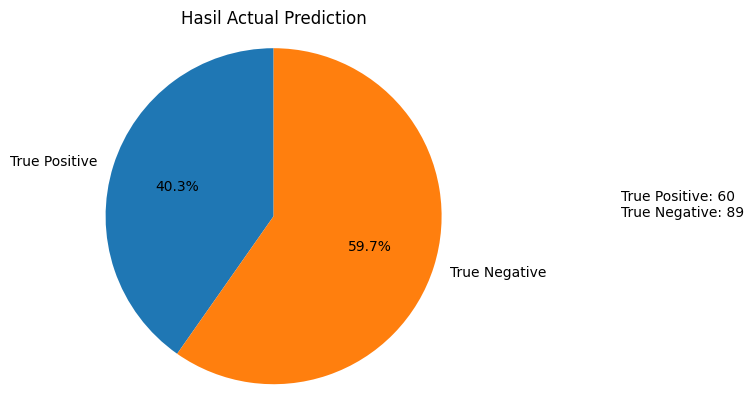

In [46]:
# prompt: tolong buatkan code yang manimplkan pie chart dari hasil prediksinya dan setelah data miningnya berisikan hasil true negative dan true positive dan buat keterangannya menggunakan bahsa indonesia serta jumlah datanya ditampilkan disamping pie chart dan jangan terlalu jauh

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (Your existing code for data preprocessing, model training, and prediction) ...

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai true positive, true negative, false positive, dan false negative
tn, fp, fn, tp = cm.ravel()

# Data untuk pie chart
labels = ['True Positive', 'True Negative']
sizes = [tp, tn]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Hasil Actual Prediction')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"True Positive: {tp}\nTrue Negative: {tn}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


In [47]:
# Split data training dan testing
x_train, x_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1565,)
(392,)
(1565,)
(392,)


In [49]:
# Fit dan transform data training
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Hanya transform data testing
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Inisialisasi dan latih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# Prediksi data testing
y_pred = nb.predict(x_test_tfidf)

In [50]:
# Evaluasi performa model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('============================================================================')
print(classification_report(y_test, y_pred, zero_division=0)) # Changed 'predicted' to 'y_pred'

Confusion Matrix:
[[183  35]
 [ 63 111]]
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.84      0.79       218
    POSITIVE       0.76      0.64      0.69       174

    accuracy                           0.75       392
   macro avg       0.75      0.74      0.74       392
weighted avg       0.75      0.75      0.75       392



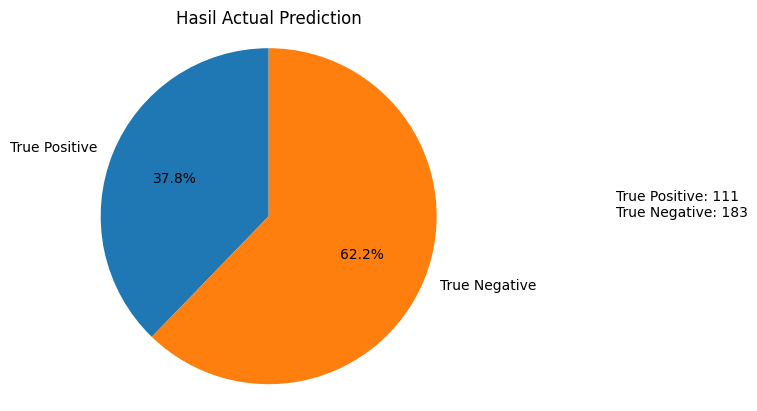

In [51]:
# prompt: tolong buatkan code yang manimplkan pie chart dari hasil prediksinya dan setelah data miningnya berisikan hasil true negative dan true positive dan buat keterangannya menggunakan bahsa indonesia serta jumlah datanya ditampilkan disamping pie chart dan jangan terlalu jauh

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (Your existing code for data preprocessing, model training, and prediction) ...

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai true positive, true negative, false positive, dan false negative
tn, fp, fn, tp = cm.ravel()

# Data untuk pie chart
labels = ['True Positive', 'True Negative']
sizes = [tp, tn]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Hasil Actual Prediction')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"True Positive: {tp}\nTrue Negative: {tn}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


In [52]:
# Split data training dan testing
x_train, x_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.3, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1369,)
(588,)
(1369,)
(588,)


In [54]:
# Fit dan transform data training
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Hanya transform data testing
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Inisialisasi dan latih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# Prediksi data testing
y_pred = nb.predict(x_test_tfidf)

In [55]:
# Evaluasi performa model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('============================================================================')
print(classification_report(y_test, y_pred, zero_division=0)) # Changed 'predicted' to 'y_pred'

Confusion Matrix:
[[278  52]
 [ 97 161]]
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.84      0.79       330
    POSITIVE       0.76      0.62      0.68       258

    accuracy                           0.75       588
   macro avg       0.75      0.73      0.74       588
weighted avg       0.75      0.75      0.74       588



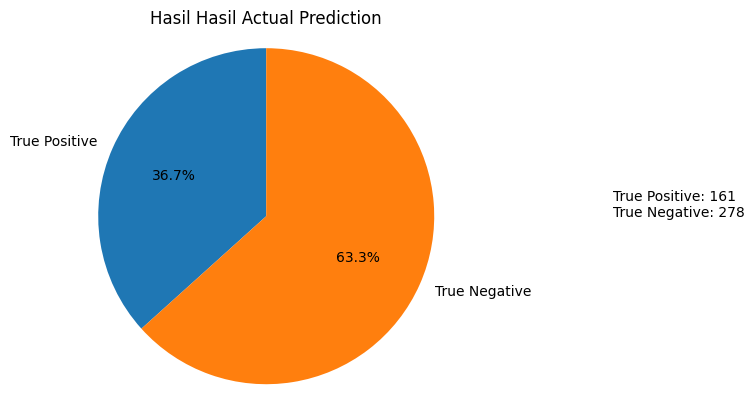

In [56]:
# prompt: tolong buatkan code yang manimplkan pie chart dari hasil prediksinya dan setelah data miningnya berisikan hasil true negative dan true positive dan buat keterangannya menggunakan bahsa indonesia serta jumlah datanya ditampilkan disamping pie chart dan jangan terlalu jauh

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (Your existing code for data preprocessing, model training, and prediction) ...

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai true positive, true negative, false positive, dan false negative
tn, fp, fn, tp = cm.ravel()

# Data untuk pie chart
labels = ['True Positive', 'True Negative']
sizes = [tp, tn]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Hasil Hasil Actual Prediction')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"True Positive: {tp}\nTrue Negative: {tn}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


#Visualisasi

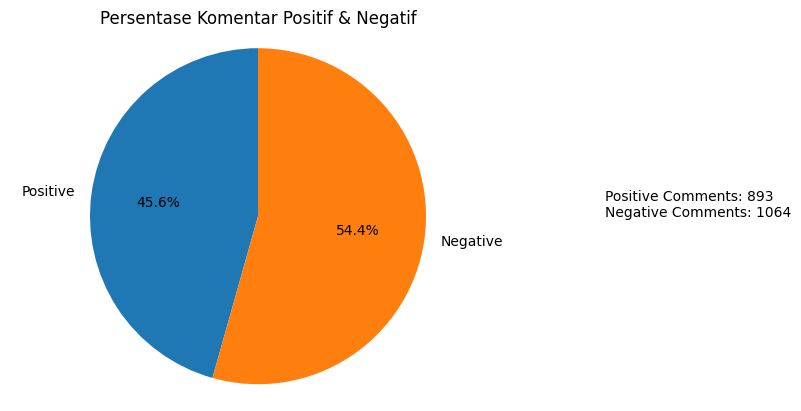

In [59]:
# prompt: tolong buatkan code yang hasilnya berisikan hasil sentimen komentar positif & negatif dalam bentuk pie chart besarta tampilkan jumlah datanya, oh ya datanya itu data dari labeling

import matplotlib.pyplot as plt

# Hitung jumlah komentar positif dan negatif dari kolom 'label'
positive_comments = (df['label'] == 'POSITIVE').sum()
negative_comments = (df['label'] == 'NEGATIVE').sum()

# Data untuk pie chart
labels = ['Positive', 'Negative']
sizes = [positive_comments, negative_comments]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Persentase Komentar Positif & Negatif')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"Positive Comments: {positive_comments}\nNegative Comments: {negative_comments}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


Visualisasi Kata yang sering muncul

In [64]:
train_s0 = df[df['label'] == 'NEGATIVE']

In [65]:
train_s0['comment'] = train_s0['comment'].fillna('tidak ada komentar')

<ipython-input-65-e725221b7b78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0['comment'] = train_s0['comment'].fillna('tidak ada komentar')


In [62]:
from wordcloud import WordCloud

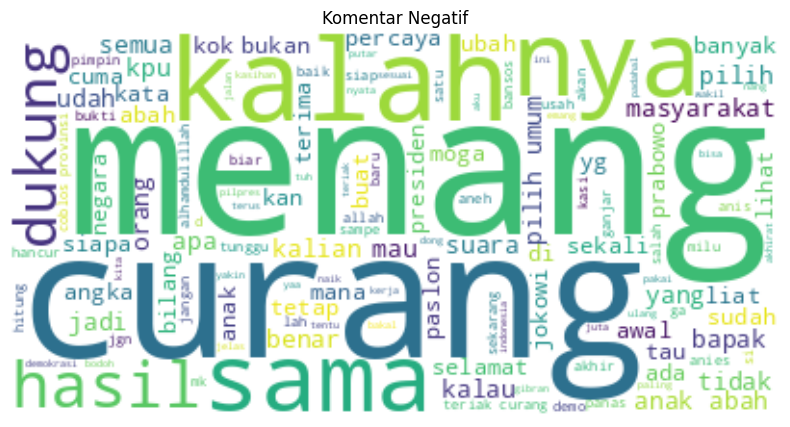

In [67]:
all_text_s0 = ' '.join(word for word in train_s0['comment'])
wordcloud = WordCloud(background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Komentar Negatif')
plt.margins(x=0, y=0)
plt.show()

In [68]:
train_s1 = df[df['label'] == 'POSITIVE']
train_s1['comment'] = train_s1['comment'].fillna('tidak ada komentar')

<ipython-input-68-ab222d11c848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1['comment'] = train_s1['comment'].fillna('tidak ada komentar')


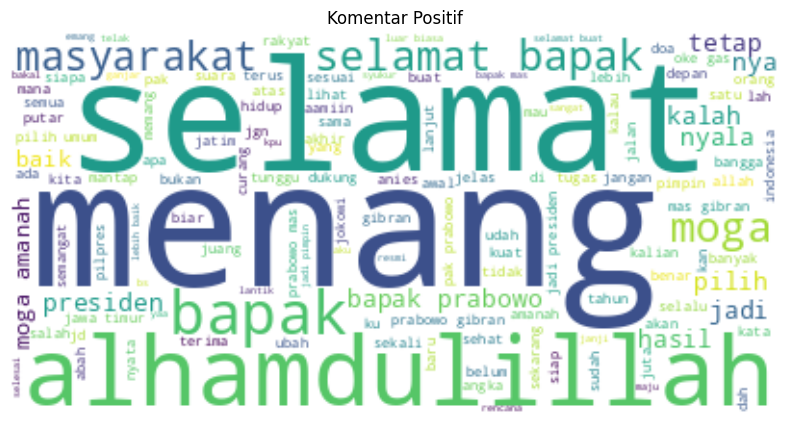

In [69]:
all_text_s1 = ' '.join(word for word in train_s1['comment'])
wordcloud = WordCloud(background_color='white').generate(all_text_s1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Komentar Positif')
plt.margins(x=0, y=0)
plt.show()

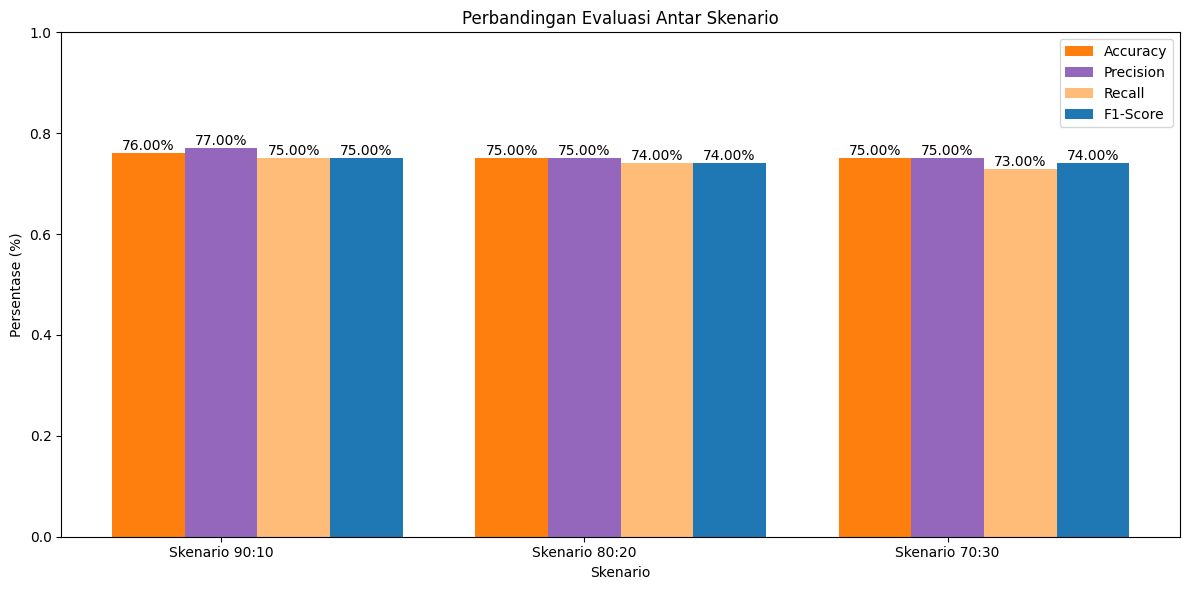

In [70]:
import matplotlib.pyplot as plt
import numpy as np
# Data
scenarios = ['Skenario 90:10', 'Skenario 80:20', 'Skenario 70:30']
accuracy = [0.76, 0.75, 0.75]
precision = [0.77, 0.75, 0.75]
recall = [0.75, 0.74, 0.73]
f1_score = [0.75, 0.74, 0.74]

# Mengatur lebar bar dan posisi
bar_width = 0.2
r1 = np.arange(len(scenarios))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Membuat plot
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, color='#ff7f0e', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='#9467bd', width=bar_width, label='Precision')
plt.bar(r3, recall, color='#ffbb78', width=bar_width, label='Recall')
plt.bar(r4, f1_score, color='#1f77b4', width=bar_width, label='F1-Score')

# Menambahkan label dan judul
plt.xlabel('Skenario')
plt.ylabel('Persentase (%)')
plt.title('Perbandingan Evaluasi Antar Skenario')
plt.xticks([r + bar_width for r in range(len(scenarios))], scenarios)

# Menambahkan nilai di atas setiap bar
for i, v in enumerate(accuracy):
    plt.text(r1[i], v, f'{v:.2%}', ha='center', va='bottom')
for i, v in enumerate(precision):
    plt.text(r2[i], v, f'{v:.2%}', ha='center', va='bottom')
for i, v in enumerate(recall):
    plt.text(r3[i], v, f'{v:.2%}', ha='center', va='bottom')
for i, v in enumerate(f1_score):
    plt.text(r4[i], v, f'{v:.2%}', ha='center', va='bottom')

# Menambahkan legend
plt.legend()

# Mengatur batas sumbu y
plt.ylim(0, 1)

# Menampilkan grafik
plt.tight_layout()
plt.show()